In [88]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [89]:
from tensorflow.contrib.layers import fully_connected

In [90]:
training_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_training-set.csv")
testing_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_testing-set.csv")

In [91]:
training_data=np.array(training_df)
testing_data=np.array(testing_df)

In [92]:
training_data.shape

(175341, 45)

In [93]:
training_labels=training_data[:,43]

In [94]:
training_features=training_data[:,0:43]

In [95]:
training_labels

array(['Normal', 'Normal', 'Normal', ..., 'Generic', 'Generic', 'Generic'],
      dtype=object)

In [96]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [97]:
#Integer Encoding Labels
for i in range(0,len(training_labels)):
    if training_labels[i]=='Normal':
        training_labels[i]=0
    elif training_labels[i]=='Fuzzers':
        training_labels[i]=1
    elif training_labels[i]=='Analysis':
        training_labels[i]=2
    elif training_labels[i]=='Backdoor':
        training_labels[i]=3
    elif training_labels[i]=='DoS':
        training_labels[i]=4
    elif training_labels[i]=='Exploits':
        training_labels[i]=5
    elif training_labels[i]=='Generic':
        training_labels[i]=6
    elif training_labels[i]=='Reconaissance':
        training_labels[i]=7
    elif training_labels[i]=='Shellcode':
        training_labels[i]=8
    elif training_labels[i]=='Worms':
        training_labels[i]=9

In [98]:
training_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=object)

In [99]:
proto=np.unique(training_features[:,2])

In [100]:
l=training_features[:,3]
for i in range(0,len(l)):
    if l[i]=='-':
        l[i]=0
    elif l[i]=='dhcp':
        l[i]=1
    elif l[i]=='dns':
        l[i]=2
    elif l[i]=='ftp':
        l[i]=3
    elif l[i]=='ftp-data':
        l[i]=4
    elif l[i]=='http':
        l[i]=5
    elif l[i]=='irc':
        l[i]=6
    elif l[i]=='pop3':
        l[i]=7
    elif l[i]=='radius':
        l[i]=8
    elif l[i]=='smtp':
        l[i]=9
    elif l[i]=='snmp':
        l[i]=10
    elif l[i]=='ssh':
        l[i]=11
    elif l[i]=='ssl':
        l[i]=12

training_features[:,3]=l

In [101]:
training_features[:,3]

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [102]:
np.unique(training_features[:,4])

array(['CON', 'ECO', 'FIN', 'INT', 'PAR', 'REQ', 'RST', 'URN', 'no'],
      dtype=object)

In [103]:
l=training_features[:,4]
for i in range(0,len(l)):
    if l[i]=='CON':
        l[i]=0
    elif l[i]=='ECO':
        l[i]=1
    elif l[i]=='FIN':
        l[i]=2
    elif l[i]=='INT':
        l[i]=3
    elif l[i]=='PAR':
        l[i]=4
    elif l[i]=='REQ':
        l[i]=5
    elif l[i]=='RST':
        l[i]=6
    elif l[i]=='URN':
        l[i]=7
    elif l[i]=='no':
        l[i]=8

training_features[:,4]=l

In [104]:
training_features[:,4]

array([2, 2, 2, ..., 3, 3, 3], dtype=object)

In [105]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [106]:
proto

array(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
       'bbn-rcc', 'bna', 'br-sat-mon', 'cbt', 'cftp', 'chaos',
       'compaq-peer', 'cphb', 'cpnx', 'crtp', 'crudp', 'dcn', 'ddp',
       'ddx', 'dgp', 'egp', 'eigrp', 'emcon', 'encap', 'etherip', 'fc',
       'fire', 'ggp', 'gmtp', 'gre', 'hmp', 'i-nlsp', 'iatp', 'ib',
       'icmp', 'idpr', 'idpr-cmtp', 'idrp', 'ifmp', 'igmp', 'igp', 'il',
       'ip', 'ipcomp', 'ipcv', 'ipip', 'iplt', 'ipnip', 'ippc', 'ipv6',
       'ipv6-frag', 'ipv6-no', 'ipv6-opts', 'ipv6-route', 'ipx-n-ip',
       'irtp', 'isis', 'iso-ip', 'iso-tp4', 'kryptolan', 'l2tp', 'larp',
       'leaf-1', 'leaf-2', 'merit-inp', 'mfe-nsp', 'mhrp', 'micp',
       'mobile', 'mtp', 'mux', 'narp', 'netblt', 'nsfnet-igp', 'nvp',
       'ospf', 'pgm', 'pim', 'pipe', 'pnni', 'pri-enc', 'prm', 'ptp',
       'pup', 'pvp', 'qnx', 'rdp', 'rsvp', 'rtp', 'rvd', 'sat-expak',
       'sat-mon', 'sccopmce', 'scps', 'sctp', 'sdrp', 'secure-vmtp',
       'sep', 'skip'

In [107]:
d=dict.fromkeys(proto)

In [108]:
l=d.keys()

In [109]:
v=0
for x in l:
    d[x]=v
    v=v+1

In [110]:
proto_list=training_features[:,2]
for i in range(0,len(proto_list)):
    for j in l:
        if proto_list[i]==j:
            proto_list[i]=d[j]

training_features[:,2]=proto_list

In [111]:
training_features

array([[1, 0.121478, 9, ..., 1, 1, 0],
       [2, 0.6499020000000001, 9, ..., 1, 6, 0],
       [3, 1.623129, 9, ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 106, ..., 3, 12, 0],
       [175340, 9e-06, 106, ..., 30, 30, 0],
       [175341, 9e-06, 106, ..., 30, 30, 0]], dtype=object)

In [112]:
training_features[:,2]

array([9, 9, 9, ..., 106, 106, 106], dtype=object)

In [113]:
training_features.shape

(175341, 43)

In [170]:
std_list=[]

In [171]:
#Perform normalization on dataset
for i in range(0,43):
    mean=np.mean(training_features[:,i])
    std=np.std(training_features[:,i])
    std_list.append(std)
    for j in range(0,175341):
        training_features[j][i]=(training_features[j][i]-mean)/std
        

In [172]:
training_features

array([[-1.7320409294121961, -0.19102880916046866, -1.0072428803230695,
        ..., -0.7157136566118933, -0.7530740174887643,
        -0.12650796304427905],
       [-1.732021173042521, -0.1094847946415462, -1.0072428803230695,
        ..., -0.7157136566118933, -0.2882570077826242,
        -0.12650796304427905],
       [-1.732001416672846, 0.04069921785260114, -1.0072428803230695,
        ..., -0.5955425666085348, -0.2882570077826242,
        -0.12650796304427905],
       ...,
       [1.732001416672846, -0.20977335880166395, 1.0573840260145126, ...,
        -0.47537147660517615, 0.2695234038647438, -0.12650796304427905],
       [1.732021173042521, -0.20977335880166395, 1.0573840260145126, ...,
        2.7692479534855057, 1.942864638806848, -0.12650796304427905],
       [1.7320409294121961, -0.20977335880166395, 1.0573840260145126,
        ..., 2.7692479534855057, 1.942864638806848, -0.12650796304427905]],
      dtype=object)

In [827]:
std_list

[1.000000000000007,
 1.0000000000003928,
 1.0000000000019662,
 0.9999999999979136,
 0.9999999999964309,
 0.999999999998072,
 1.0000000000005504,
 0.9999999999992848,
 0.9999999999987064,
 1.0000000000003129,
 1.0000000000050369,
 1.0000000000008913,
 1.0000000000004523,
 1.0000000000008373,
 1.0000000000034135,
 0.9999999999995322,
 1.000000000000258,
 0.9999999999978989,
 0.9999999999989959,
 0.9999999999989396,
 0.9999999999998518,
 0.9999999999997494,
 1.0000000000016285,
 1.000000000000457,
 1.0000000000004556,
 0.9999999999967515,
 1.0000000000000224,
 1.0000000000021194,
 0.9999999999986858,
 0.999999999995503,
 1.0000000000018177,
 1.0000000000001512,
 0.9999999999994347,
 0.9999999999998268,
 0.9999999999997047,
 1.0000000000001366,
 0.9999999999998583,
 0.999999999999065,
 0.999999999999065,
 1.0000000000044498,
 1.0000000000002165,
 1.000000000000043,
 0.9999999999984679]

In [828]:
num_inputs=43
num_hid1=22
num_hid2=10
num_hid3=22
num_output=43

In [829]:
lr=0.01
actf=tf.nn.elu

In [830]:
X=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [831]:
initializer=tf.variance_scaling_initializer()

In [832]:
w1=tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([num_hid3,num_output]),dtype=tf.float32)

In [833]:
b1=tf.Variable(tf.zeros(num_hid1))
b2=tf.Variable(tf.zeros(num_hid2))
b3=tf.Variable(tf.zeros(num_hid3))
b4=tf.Variable(tf.zeros(num_output))

In [834]:
hid_layer1=actf(tf.matmul(X,w1)+b1)
hid_layer2=actf(tf.matmul(hid_layer1,w2)+b2)
hid_layer3=actf(tf.matmul(hid_layer2,w3)+b3)
output_layer=actf(tf.matmul(hid_layer3,w4)+b4)

In [835]:
def show_hist_of_weight(all_weight_list,status='before'):
    fig = plt.figure()
    weight_index = 0

    for i in range(1,1+int(len(all_weight_list)//3)):
        ax = fig.add_subplot(1,4,i)
        ax.grid(False)
        temp_weight_list = all_weight_list[weight_index:weight_index+3]
        for temp_index in range(len(temp_weight_list)):
            current_flat = temp_weight_list[temp_index].flatten()
            ax.hist(current_flat,histtype='step',bins='auto',label=str(temp_index+weight_index))
            ax.legend()
        ax.set_title('From Layer : '+str(weight_index+1)+' to '+str(weight_index+3))
        weight_index = weight_index + 3
    plt.savefig('viz/weights_'+str(status)+"_training.png")
    plt.close('all')

In [836]:
loss=tf.reduce_mean(tf.square(output_layer-X))

In [837]:
optimizer=tf.train.AdamOptimizer(lr)
train=optimizer.minimize(loss)

In [838]:
init=tf.global_variables_initializer()

In [839]:
num_epoch=5000
batch_size=100000

In [840]:
def next_batch(num, data):
    '''
    Return a total of `num` random samples 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]

    return np.asarray(data_shuffle)

In [841]:
x=[]
y=[]
l=[]

In [842]:
with tf.Session() as sess:
    sess.run(init)
    vars=tf.trainable_variables()
    vars_vals=sess.run(vars)
    for epoch in range(num_epoch):
        num_batches=len(training_features)//batch_size
        #learning rate decay
        lr = lr * (0.7 **(epoch//25))
        for iteration in range(num_batches):
            X_batch=next_batch(batch_size,training_features)
            sess.run(train,feed_dict={X:X_batch})
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        x.append(epoch)
        y.append(train_loss)
    for var, val in zip(vars, vars_vals):
        if var.get_shape()==(43, 22):
            l=val
print(l)  

epoch 0 loss 0.963262677192688
epoch 1 loss 0.8980672955513
epoch 2 loss 0.8420770764350891
epoch 3 loss 0.7922260761260986
epoch 4 loss 0.7568933963775635
epoch 5 loss 0.6961952447891235
epoch 6 loss 0.6685104370117188
epoch 7 loss 0.643862783908844
epoch 8 loss 0.5976448655128479
epoch 9 loss 0.5857242941856384
epoch 10 loss 0.5767986178398132
epoch 11 loss 0.5330427885055542
epoch 12 loss 0.5084181427955627
epoch 13 loss 0.5173481106758118
epoch 14 loss 0.4765852689743042
epoch 15 loss 0.47059983015060425
epoch 16 loss 0.4497564435005188
epoch 17 loss 0.4409177899360657
epoch 18 loss 0.4091288447380066
epoch 19 loss 0.3906320333480835
epoch 20 loss 0.3890543580055237
epoch 21 loss 0.3629605174064636
epoch 22 loss 0.361530065536499
epoch 23 loss 0.37380656599998474
epoch 24 loss 0.3462086021900177
epoch 25 loss 0.338133305311203
epoch 26 loss 0.31969618797302246
epoch 27 loss 0.3157486915588379
epoch 28 loss 0.31360945105552673
epoch 29 loss 0.30431127548217773
epoch 30 loss 0.306608

epoch 240 loss 0.06153523176908493
epoch 241 loss 0.06206708028912544
epoch 242 loss 0.06192706525325775
epoch 243 loss 0.06128799542784691
epoch 244 loss 0.06169883906841278
epoch 245 loss 0.06128489971160889
epoch 246 loss 0.06158146634697914
epoch 247 loss 0.06264907121658325
epoch 248 loss 0.06235039234161377
epoch 249 loss 0.06265564262866974
epoch 250 loss 0.06139717996120453
epoch 251 loss 0.06160968914628029
epoch 252 loss 0.06178556755185127
epoch 253 loss 0.06094243377447128
epoch 254 loss 0.06165178865194321
epoch 255 loss 0.0614323690533638
epoch 256 loss 0.06125316768884659
epoch 257 loss 0.06167988479137421
epoch 258 loss 0.06052326783537865
epoch 259 loss 0.06089935079216957
epoch 260 loss 0.06116193160414696
epoch 261 loss 0.05967048555612564
epoch 262 loss 0.06038222461938858
epoch 263 loss 0.06014440581202507
epoch 264 loss 0.05954865366220474
epoch 265 loss 0.05958383530378342
epoch 266 loss 0.05935340374708176
epoch 267 loss 0.059630122035741806
epoch 268 loss 0.059

epoch 473 loss 0.04633154720067978
epoch 474 loss 0.046273231506347656
epoch 475 loss 0.0456882081925869
epoch 476 loss 0.04609369859099388
epoch 477 loss 0.04711325466632843
epoch 478 loss 0.046140898019075394
epoch 479 loss 0.046249862760305405
epoch 480 loss 0.04614946246147156
epoch 481 loss 0.04600927233695984
epoch 482 loss 0.046326205134391785
epoch 483 loss 0.04645616188645363
epoch 484 loss 0.045268721878528595
epoch 485 loss 0.045578744262456894
epoch 486 loss 0.045540306717157364
epoch 487 loss 0.04504448547959328
epoch 488 loss 0.04540952667593956
epoch 489 loss 0.04494896158576012
epoch 490 loss 0.04556472972035408
epoch 491 loss 0.045469019562006
epoch 492 loss 0.04539451375603676
epoch 493 loss 0.04624491184949875
epoch 494 loss 0.04602593928575516
epoch 495 loss 0.0458984449505806
epoch 496 loss 0.04512469470500946
epoch 497 loss 0.045722413808107376
epoch 498 loss 0.045484017580747604
epoch 499 loss 0.0449972003698349
epoch 500 loss 0.044883932918310165
epoch 501 loss 

epoch 706 loss 0.03897671401500702
epoch 707 loss 0.03919662907719612
epoch 708 loss 0.04000553861260414
epoch 709 loss 0.040380652993917465
epoch 710 loss 0.04077485576272011
epoch 711 loss 0.04116861894726753
epoch 712 loss 0.04104902595281601
epoch 713 loss 0.04101517051458359
epoch 714 loss 0.04151955619454384
epoch 715 loss 0.041162166744470596
epoch 716 loss 0.04051795229315758
epoch 717 loss 0.04047442600131035
epoch 718 loss 0.03948831558227539
epoch 719 loss 0.03991163522005081
epoch 720 loss 0.04034845530986786
epoch 721 loss 0.04001597315073013
epoch 722 loss 0.04051966965198517
epoch 723 loss 0.04049086570739746
epoch 724 loss 0.039766788482666016
epoch 725 loss 0.039717305451631546
epoch 726 loss 0.03923751413822174
epoch 727 loss 0.03971928730607033
epoch 728 loss 0.04002051055431366
epoch 729 loss 0.040131524205207825
epoch 730 loss 0.0390603132545948
epoch 731 loss 0.03942542150616646
epoch 732 loss 0.039912763983011246
epoch 733 loss 0.0397103913128376
epoch 734 loss 0

epoch 939 loss 0.03774065896868706
epoch 940 loss 0.03765072673559189
epoch 941 loss 0.03705928847193718
epoch 942 loss 0.03757437691092491
epoch 943 loss 0.037521641701459885
epoch 944 loss 0.037167929112911224
epoch 945 loss 0.03697248548269272
epoch 946 loss 0.037202559411525726
epoch 947 loss 0.037930361926555634
epoch 948 loss 0.037358492612838745
epoch 949 loss 0.037347059696912766
epoch 950 loss 0.036902353167533875
epoch 951 loss 0.03662722930312157
epoch 952 loss 0.03727182000875473
epoch 953 loss 0.03742079809308052
epoch 954 loss 0.03814290836453438
epoch 955 loss 0.038464900106191635
epoch 956 loss 0.03948383033275604
epoch 957 loss 0.039369769394397736
epoch 958 loss 0.03905775398015976
epoch 959 loss 0.03884125128388405
epoch 960 loss 0.03957606479525566
epoch 961 loss 0.039440277963876724
epoch 962 loss 0.03848971799015999
epoch 963 loss 0.03750402480363846
epoch 964 loss 0.038739241659641266
epoch 965 loss 0.038803279399871826
epoch 966 loss 0.03918037191033363
epoch 96

epoch 1167 loss 0.037157997488975525
epoch 1168 loss 0.03651747852563858
epoch 1169 loss 0.03660626336932182
epoch 1170 loss 0.03636842221021652
epoch 1171 loss 0.036042600870132446
epoch 1172 loss 0.03608304262161255
epoch 1173 loss 0.03658725693821907
epoch 1174 loss 0.03585748001933098
epoch 1175 loss 0.035955313593149185
epoch 1176 loss 0.036015160381793976
epoch 1177 loss 0.03611062094569206
epoch 1178 loss 0.03613746538758278
epoch 1179 loss 0.03572739660739899
epoch 1180 loss 0.03570413589477539
epoch 1181 loss 0.03620743751525879
epoch 1182 loss 0.03587684407830238
epoch 1183 loss 0.0354110524058342
epoch 1184 loss 0.03598636016249657
epoch 1185 loss 0.035835038870573044
epoch 1186 loss 0.0360669270157814
epoch 1187 loss 0.035767316818237305
epoch 1188 loss 0.03643578290939331
epoch 1189 loss 0.03647416830062866
epoch 1190 loss 0.03685621917247772
epoch 1191 loss 0.037109699100255966
epoch 1192 loss 0.03693920373916626
epoch 1193 loss 0.036625299602746964
epoch 1194 loss 0.0361

epoch 1393 loss 0.034403517842292786
epoch 1394 loss 0.03475786745548248
epoch 1395 loss 0.03508041799068451
epoch 1396 loss 0.034977734088897705
epoch 1397 loss 0.034692078828811646
epoch 1398 loss 0.03498803451657295
epoch 1399 loss 0.03546809405088425
epoch 1400 loss 0.035115066915750504
epoch 1401 loss 0.03512688726186752
epoch 1402 loss 0.03471626341342926
epoch 1403 loss 0.03503197059035301
epoch 1404 loss 0.03532637283205986
epoch 1405 loss 0.03571263700723648
epoch 1406 loss 0.035426560789346695
epoch 1407 loss 0.034973789006471634
epoch 1408 loss 0.03500775620341301
epoch 1409 loss 0.035579804331064224
epoch 1410 loss 0.03558340668678284
epoch 1411 loss 0.03504074737429619
epoch 1412 loss 0.034647051244974136
epoch 1413 loss 0.03491786867380142
epoch 1414 loss 0.03468887135386467
epoch 1415 loss 0.0344841443002224
epoch 1416 loss 0.034756649285554886
epoch 1417 loss 0.03461415693163872
epoch 1418 loss 0.0349404513835907
epoch 1419 loss 0.03511083871126175
epoch 1420 loss 0.034

epoch 1619 loss 0.03435080498456955
epoch 1620 loss 0.035149235278367996
epoch 1621 loss 0.03457016870379448
epoch 1622 loss 0.0345115028321743
epoch 1623 loss 0.03490277752280235
epoch 1624 loss 0.03425326943397522
epoch 1625 loss 0.034132957458496094
epoch 1626 loss 0.034052200615406036
epoch 1627 loss 0.03432035446166992
epoch 1628 loss 0.034494973719120026
epoch 1629 loss 0.03451770171523094
epoch 1630 loss 0.03446566313505173
epoch 1631 loss 0.03445805609226227
epoch 1632 loss 0.0345333069562912
epoch 1633 loss 0.03466271981596947
epoch 1634 loss 0.03459536284208298
epoch 1635 loss 0.034580450505018234
epoch 1636 loss 0.03459441289305687
epoch 1637 loss 0.03467428684234619
epoch 1638 loss 0.0343477837741375
epoch 1639 loss 0.03409246727824211
epoch 1640 loss 0.033643923699855804
epoch 1641 loss 0.033689916133880615
epoch 1642 loss 0.03388223052024841
epoch 1643 loss 0.03385135903954506
epoch 1644 loss 0.03396817669272423
epoch 1645 loss 0.03380163758993149
epoch 1646 loss 0.033986

epoch 1846 loss 0.03362160176038742
epoch 1847 loss 0.033492207527160645
epoch 1848 loss 0.033338017761707306
epoch 1849 loss 0.03313510864973068
epoch 1850 loss 0.03329813852906227
epoch 1851 loss 0.03401905670762062
epoch 1852 loss 0.033900145441293716
epoch 1853 loss 0.03334571048617363
epoch 1854 loss 0.033062878996133804
epoch 1855 loss 0.03279250115156174
epoch 1856 loss 0.03285762295126915
epoch 1857 loss 0.03318089246749878
epoch 1858 loss 0.034456219524145126
epoch 1859 loss 0.03465556725859642
epoch 1860 loss 0.03401325270533562
epoch 1861 loss 0.03288113698363304
epoch 1862 loss 0.03413219749927521
epoch 1863 loss 0.03538469597697258
epoch 1864 loss 0.034634556621313095
epoch 1865 loss 0.03397413343191147
epoch 1866 loss 0.034220416098833084
epoch 1867 loss 0.03514976426959038
epoch 1868 loss 0.035191621631383896
epoch 1869 loss 0.03462657704949379
epoch 1870 loss 0.034524913877248764
epoch 1871 loss 0.035099007189273834
epoch 1872 loss 0.03473766893148422
epoch 1873 loss 0.

epoch 2073 loss 0.03248519077897072
epoch 2074 loss 0.032039374113082886
epoch 2075 loss 0.03266928717494011
epoch 2076 loss 0.03284703940153122
epoch 2077 loss 0.032846078276634216
epoch 2078 loss 0.032470423728227615
epoch 2079 loss 0.03272112086415291
epoch 2080 loss 0.032440364360809326
epoch 2081 loss 0.03249957785010338
epoch 2082 loss 0.03216016665101051
epoch 2083 loss 0.032445278018713
epoch 2084 loss 0.03212953731417656
epoch 2085 loss 0.03181144595146179
epoch 2086 loss 0.03240611031651497
epoch 2087 loss 0.0319511853158474
epoch 2088 loss 0.03223211318254471
epoch 2089 loss 0.031955718994140625
epoch 2090 loss 0.031983453780412674
epoch 2091 loss 0.03211205452680588
epoch 2092 loss 0.03197268024086952
epoch 2093 loss 0.032283466309309006
epoch 2094 loss 0.03210056573152542
epoch 2095 loss 0.03211834281682968
epoch 2096 loss 0.03181307390332222
epoch 2097 loss 0.032036006450653076
epoch 2098 loss 0.03196790814399719
epoch 2099 loss 0.031718574464321136
epoch 2100 loss 0.0323

epoch 2300 loss 0.03211772069334984
epoch 2301 loss 0.03180569410324097
epoch 2302 loss 0.03215136006474495
epoch 2303 loss 0.032320331782102585
epoch 2304 loss 0.03283144161105156
epoch 2305 loss 0.03218509629368782
epoch 2306 loss 0.03192503750324249
epoch 2307 loss 0.03195808455348015
epoch 2308 loss 0.03234970197081566
epoch 2309 loss 0.033162135630846024
epoch 2310 loss 0.03227684646844864
epoch 2311 loss 0.032529041171073914
epoch 2312 loss 0.03304086625576019
epoch 2313 loss 0.032891999930143356
epoch 2314 loss 0.03246592357754707
epoch 2315 loss 0.03222072124481201
epoch 2316 loss 0.03312785550951958
epoch 2317 loss 0.0348895862698555
epoch 2318 loss 0.033600326627492905
epoch 2319 loss 0.033243391662836075
epoch 2320 loss 0.03348715230822563
epoch 2321 loss 0.0342976413667202
epoch 2322 loss 0.03460637107491493
epoch 2323 loss 0.03349824249744415
epoch 2324 loss 0.03412112966179848
epoch 2325 loss 0.03498845174908638
epoch 2326 loss 0.033199142664670944
epoch 2327 loss 0.03327

epoch 2526 loss 0.03235805779695511
epoch 2527 loss 0.032292164862155914
epoch 2528 loss 0.032572463154792786
epoch 2529 loss 0.032627005130052567
epoch 2530 loss 0.03258674964308739
epoch 2531 loss 0.03172463923692703
epoch 2532 loss 0.03185439109802246
epoch 2533 loss 0.032543785870075226
epoch 2534 loss 0.03311673551797867
epoch 2535 loss 0.03288066014647484
epoch 2536 loss 0.03186090663075447
epoch 2537 loss 0.03179910033941269
epoch 2538 loss 0.03212921693921089
epoch 2539 loss 0.032674264162778854
epoch 2540 loss 0.032162997871637344
epoch 2541 loss 0.03181982412934303
epoch 2542 loss 0.0320410318672657
epoch 2543 loss 0.03212064504623413
epoch 2544 loss 0.03161943703889847
epoch 2545 loss 0.03217363357543945
epoch 2546 loss 0.03198607638478279
epoch 2547 loss 0.031799688935279846
epoch 2548 loss 0.03139526769518852
epoch 2549 loss 0.03173213079571724
epoch 2550 loss 0.03291352465748787
epoch 2551 loss 0.0322151780128479
epoch 2552 loss 0.031326014548540115
epoch 2553 loss 0.0309

epoch 2752 loss 0.0317058227956295
epoch 2753 loss 0.03125748410820961
epoch 2754 loss 0.03122672252357006
epoch 2755 loss 0.031366605311632156
epoch 2756 loss 0.031681161373853683
epoch 2757 loss 0.03169344365596771
epoch 2758 loss 0.031202754005789757
epoch 2759 loss 0.031160039827227592
epoch 2760 loss 0.032180145382881165
epoch 2761 loss 0.032820116728544235
epoch 2762 loss 0.033031024038791656
epoch 2763 loss 0.03211111202836037
epoch 2764 loss 0.03205854818224907
epoch 2765 loss 0.03241666033864021
epoch 2766 loss 0.03272449970245361
epoch 2767 loss 0.03293803334236145
epoch 2768 loss 0.03307487443089485
epoch 2769 loss 0.03315482661128044
epoch 2770 loss 0.032182224094867706
epoch 2771 loss 0.031485334038734436
epoch 2772 loss 0.031884223222732544
epoch 2773 loss 0.032191235572099686
epoch 2774 loss 0.03175516426563263
epoch 2775 loss 0.032083410769701004
epoch 2776 loss 0.03287343308329582
epoch 2777 loss 0.032726895064115524
epoch 2778 loss 0.03231460228562355
epoch 2779 loss 

epoch 2978 loss 0.03223968669772148
epoch 2979 loss 0.03184835612773895
epoch 2980 loss 0.031132565811276436
epoch 2981 loss 0.03157248720526695
epoch 2982 loss 0.03145797923207283
epoch 2983 loss 0.031521767377853394
epoch 2984 loss 0.03129640221595764
epoch 2985 loss 0.031249672174453735
epoch 2986 loss 0.031000269576907158
epoch 2987 loss 0.03156685829162598
epoch 2988 loss 0.03078879415988922
epoch 2989 loss 0.030956314876675606
epoch 2990 loss 0.03068513795733452
epoch 2991 loss 0.030912896618247032
epoch 2992 loss 0.03112679533660412
epoch 2993 loss 0.03070698492228985
epoch 2994 loss 0.030513005331158638
epoch 2995 loss 0.031079499050974846
epoch 2996 loss 0.03091316856443882
epoch 2997 loss 0.03079840913414955
epoch 2998 loss 0.030690966174006462
epoch 2999 loss 0.03048885241150856
epoch 3000 loss 0.030710486695170403
epoch 3001 loss 0.030572954565286636
epoch 3002 loss 0.03063228167593479
epoch 3003 loss 0.03041127137839794
epoch 3004 loss 0.030689643695950508
epoch 3005 loss 

epoch 3204 loss 0.030435610562562943
epoch 3205 loss 0.03090832196176052
epoch 3206 loss 0.030757976695895195
epoch 3207 loss 0.030433623120188713
epoch 3208 loss 0.030463535338640213
epoch 3209 loss 0.031034523621201515
epoch 3210 loss 0.031081965193152428
epoch 3211 loss 0.031120769679546356
epoch 3212 loss 0.0312751904129982
epoch 3213 loss 0.030328836292028427
epoch 3214 loss 0.030511805787682533
epoch 3215 loss 0.030597848817706108
epoch 3216 loss 0.03010314330458641
epoch 3217 loss 0.030309375375509262
epoch 3218 loss 0.03056173026561737
epoch 3219 loss 0.030692627653479576
epoch 3220 loss 0.030823539942502975
epoch 3221 loss 0.03132624551653862
epoch 3222 loss 0.030893495306372643
epoch 3223 loss 0.031225958839058876
epoch 3224 loss 0.03153824806213379
epoch 3225 loss 0.031155182048678398
epoch 3226 loss 0.031231369823217392
epoch 3227 loss 0.031228484585881233
epoch 3228 loss 0.031846314668655396
epoch 3229 loss 0.03155707195401192
epoch 3230 loss 0.031397297978401184
epoch 323

epoch 3430 loss 0.02976657636463642
epoch 3431 loss 0.029807940125465393
epoch 3432 loss 0.029702048748731613
epoch 3433 loss 0.02983729913830757
epoch 3434 loss 0.029769448563456535
epoch 3435 loss 0.029864152893424034
epoch 3436 loss 0.029916714876890182
epoch 3437 loss 0.02943224273622036
epoch 3438 loss 0.030031612142920494
epoch 3439 loss 0.03014959581196308
epoch 3440 loss 0.030300822108983994
epoch 3441 loss 0.030823422595858574
epoch 3442 loss 0.030844898894429207
epoch 3443 loss 0.03097468428313732
epoch 3444 loss 0.03127174451947212
epoch 3445 loss 0.031005537137389183
epoch 3446 loss 0.030787311494350433
epoch 3447 loss 0.03096868470311165
epoch 3448 loss 0.031056351959705353
epoch 3449 loss 0.03105626441538334
epoch 3450 loss 0.030672231689095497
epoch 3451 loss 0.030896032229065895
epoch 3452 loss 0.03158724680542946
epoch 3453 loss 0.031586386263370514
epoch 3454 loss 0.03160296007990837
epoch 3455 loss 0.03107142075896263
epoch 3456 loss 0.030475551262497902
epoch 3457 l

epoch 3655 loss 0.03094409964978695
epoch 3656 loss 0.030923346057534218
epoch 3657 loss 0.030568553134799004
epoch 3658 loss 0.03118511661887169
epoch 3659 loss 0.030500264838337898
epoch 3660 loss 0.030233001336455345
epoch 3661 loss 0.030386855825781822
epoch 3662 loss 0.030404850840568542
epoch 3663 loss 0.03047984465956688
epoch 3664 loss 0.03041834570467472
epoch 3665 loss 0.03024657815694809
epoch 3666 loss 0.030506527051329613
epoch 3667 loss 0.030523361638188362
epoch 3668 loss 0.030355215072631836
epoch 3669 loss 0.029901539906859398
epoch 3670 loss 0.03022945486009121
epoch 3671 loss 0.030487259849905968
epoch 3672 loss 0.03059607557952404
epoch 3673 loss 0.03018862195312977
epoch 3674 loss 0.030118655413389206
epoch 3675 loss 0.030235901474952698
epoch 3676 loss 0.030476504936814308
epoch 3677 loss 0.030987678095698357
epoch 3678 loss 0.030726801604032516
epoch 3679 loss 0.030182484537363052
epoch 3680 loss 0.030416781082749367
epoch 3681 loss 0.030619099736213684
epoch 368

epoch 3879 loss 0.03239031881093979
epoch 3880 loss 0.0323137491941452
epoch 3881 loss 0.03151969611644745
epoch 3882 loss 0.03243245184421539
epoch 3883 loss 0.03281083703041077
epoch 3884 loss 0.03166739642620087
epoch 3885 loss 0.03130036219954491
epoch 3886 loss 0.03342241421341896
epoch 3887 loss 0.03246428072452545
epoch 3888 loss 0.03082466498017311
epoch 3889 loss 0.03098737634718418
epoch 3890 loss 0.03157801181077957
epoch 3891 loss 0.03185650706291199
epoch 3892 loss 0.030903978273272514
epoch 3893 loss 0.03058936819434166
epoch 3894 loss 0.03236759454011917
epoch 3895 loss 0.03125859424471855
epoch 3896 loss 0.030967092141509056
epoch 3897 loss 0.032154541462659836
epoch 3898 loss 0.031141383573412895
epoch 3899 loss 0.031124567613005638
epoch 3900 loss 0.031140778213739395
epoch 3901 loss 0.03151359036564827
epoch 3902 loss 0.031572967767715454
epoch 3903 loss 0.030819997191429138
epoch 3904 loss 0.031110791489481926
epoch 3905 loss 0.03018178790807724
epoch 3906 loss 0.03

epoch 4104 loss 0.031109288334846497
epoch 4105 loss 0.030208967626094818
epoch 4106 loss 0.03087722323834896
epoch 4107 loss 0.031204737722873688
epoch 4108 loss 0.030718496069312096
epoch 4109 loss 0.02997940219938755
epoch 4110 loss 0.030233386904001236
epoch 4111 loss 0.03054996393620968
epoch 4112 loss 0.03020917996764183
epoch 4113 loss 0.02957443706691265
epoch 4114 loss 0.03005813993513584
epoch 4115 loss 0.0302878450602293
epoch 4116 loss 0.030637241899967194
epoch 4117 loss 0.02979828603565693
epoch 4118 loss 0.029682699590921402
epoch 4119 loss 0.03020039200782776
epoch 4120 loss 0.03039722330868244
epoch 4121 loss 0.029883043840527534
epoch 4122 loss 0.029526837170124054
epoch 4123 loss 0.02998359315097332
epoch 4124 loss 0.03040771186351776
epoch 4125 loss 0.030205901712179184
epoch 4126 loss 0.03017628937959671
epoch 4127 loss 0.029477780684828758
epoch 4128 loss 0.02987653948366642
epoch 4129 loss 0.030178578570485115
epoch 4130 loss 0.029599521309137344
epoch 4131 loss 

epoch 4329 loss 0.03010900691151619
epoch 4330 loss 0.03252739831805229
epoch 4331 loss 0.03237929195165634
epoch 4332 loss 0.03198596462607384
epoch 4333 loss 0.032372910529375076
epoch 4334 loss 0.0314972959458828
epoch 4335 loss 0.031034134328365326
epoch 4336 loss 0.03137891739606857
epoch 4337 loss 0.03206845745444298
epoch 4338 loss 0.031294967979192734
epoch 4339 loss 0.03135155141353607
epoch 4340 loss 0.03167803958058357
epoch 4341 loss 0.03174259513616562
epoch 4342 loss 0.03133296221494675
epoch 4343 loss 0.030144577845931053
epoch 4344 loss 0.03037717007100582
epoch 4345 loss 0.03119008056819439
epoch 4346 loss 0.03177352622151375
epoch 4347 loss 0.030612725764513016
epoch 4348 loss 0.030300196260213852
epoch 4349 loss 0.030437570065259933
epoch 4350 loss 0.031283993273973465
epoch 4351 loss 0.03202839568257332
epoch 4352 loss 0.031032172963023186
epoch 4353 loss 0.029943324625492096
epoch 4354 loss 0.030635755509138107
epoch 4355 loss 0.031015334650874138
epoch 4356 loss 0

epoch 4553 loss 0.029437940567731857
epoch 4554 loss 0.029245708137750626
epoch 4555 loss 0.029655473306775093
epoch 4556 loss 0.02963375672698021
epoch 4557 loss 0.02881700173020363
epoch 4558 loss 0.02900841273367405
epoch 4559 loss 0.028925184160470963
epoch 4560 loss 0.028739938512444496
epoch 4561 loss 0.02902677282691002
epoch 4562 loss 0.02870752662420273
epoch 4563 loss 0.02871738187968731
epoch 4564 loss 0.028885696083307266
epoch 4565 loss 0.029248861595988274
epoch 4566 loss 0.028652120381593704
epoch 4567 loss 0.02858625166118145
epoch 4568 loss 0.029155736789107323
epoch 4569 loss 0.028964854776859283
epoch 4570 loss 0.028880108147859573
epoch 4571 loss 0.029146721586585045
epoch 4572 loss 0.029077572748064995
epoch 4573 loss 0.028612224385142326
epoch 4574 loss 0.028963260352611542
epoch 4575 loss 0.028788955882191658
epoch 4576 loss 0.02857486717402935
epoch 4577 loss 0.02883240580558777
epoch 4578 loss 0.028721023350954056
epoch 4579 loss 0.02874865010380745
epoch 4580 

epoch 4778 loss 0.029207179322838783
epoch 4779 loss 0.02880307473242283
epoch 4780 loss 0.028654322028160095
epoch 4781 loss 0.0289792288094759
epoch 4782 loss 0.029913263395428658
epoch 4783 loss 0.030645806342363358
epoch 4784 loss 0.029822254553437233
epoch 4785 loss 0.029166096821427345
epoch 4786 loss 0.029240211471915245
epoch 4787 loss 0.029631471261382103
epoch 4788 loss 0.03008258529007435
epoch 4789 loss 0.030010798946022987
epoch 4790 loss 0.02916852943599224
epoch 4791 loss 0.029271475970745087
epoch 4792 loss 0.02999073453247547
epoch 4793 loss 0.030524710193276405
epoch 4794 loss 0.02989155240356922
epoch 4795 loss 0.02972269617021084
epoch 4796 loss 0.02961375191807747
epoch 4797 loss 0.029904689639806747
epoch 4798 loss 0.03029644303023815
epoch 4799 loss 0.029606301337480545
epoch 4800 loss 0.028788825497031212
epoch 4801 loss 0.029162107035517693
epoch 4802 loss 0.02968146838247776
epoch 4803 loss 0.0299580916762352
epoch 4804 loss 0.028990577906370163
epoch 4805 los

In [843]:
sum_weights=[]
for row in l:
    total_weight=0
    for a in row:
        total_weight+=a
    sum_weights.append(total_weight)

In [847]:
sum_weights

[-0.8716307524591684,
 1.2717612786218524,
 0.6402742581267375,
 0.5347269023768604,
 -0.26560110691934824,
 -0.8795046443119645,
 1.6390217752195895,
 -0.46276711582322605,
 0.3505568001419306,
 0.6829184405505657,
 -0.15047567686997354,
 0.0801323764026165,
 -1.655734671279788,
 -0.07364903762936592,
 -0.11297893989831209,
 0.7280159797519445,
 -0.3207965121837333,
 0.2710666203565779,
 -1.4587013516575098,
 -0.3947224245639518,
 -0.6513584423810244,
 0.028478505555540323,
 0.2378494389122352,
 -0.2656618785113096,
 -0.31616027490235865,
 -0.2097058603540063,
 0.1941822471562773,
 0.006827623583376408,
 -1.018031126819551,
 -0.735249487683177,
 0.35396216809749603,
 0.636562924599275,
 0.35366838581103366,
 0.7929751940537244,
 -0.17768356949090958,
 -0.3704082644544542,
 -0.05124909058213234,
 0.03376974072307348,
 -1.2261494148988277,
 0.3554985031951219,
 -0.5341673474758863,
 0.2787165744230151,
 -0.36899252398870885]

In [850]:
std_list

[1.000000000000007,
 1.0000000000003928,
 1.0000000000019662,
 0.9999999999979136,
 0.9999999999964309,
 0.999999999998072,
 1.0000000000005504,
 0.9999999999992848,
 0.9999999999987064,
 1.0000000000003129,
 1.0000000000050369,
 1.0000000000008913,
 1.0000000000004523,
 1.0000000000008373,
 1.0000000000034135,
 0.9999999999995322,
 1.000000000000258,
 0.9999999999978989,
 0.9999999999989959,
 0.9999999999989396,
 0.9999999999998518,
 0.9999999999997494,
 1.0000000000016285,
 1.000000000000457,
 1.0000000000004556,
 0.9999999999967515,
 1.0000000000000224,
 1.0000000000021194,
 0.9999999999986858,
 0.999999999995503,
 1.0000000000018177,
 1.0000000000001512,
 0.9999999999994347,
 0.9999999999998268,
 0.9999999999997047,
 1.0000000000001366,
 0.9999999999998583,
 0.999999999999065,
 0.999999999999065,
 1.0000000000044498,
 1.0000000000002165,
 1.000000000000043,
 0.9999999999984679]

In [849]:
var_imp=[]
for i in range(0,len(sum_weights)):
    prod=std_list[i]*sum_weights[i]
    var_imp.append(prod)

In [851]:
var_imp

[-0.8716307524591747,
 1.271761278622352,
 0.6402742581279964,
 0.5347269023757447,
 -0.2656011069184003,
 -0.8795046443102689,
 1.6390217752204916,
 -0.4627671158228951,
 0.3505568001414771,
 0.6829184405507793,
 -0.15047567687073146,
 0.08013237640268792,
 -1.655734671280537,
 -0.0736490376294276,
 -0.11297893989869774,
 0.7280159797516039,
 -0.32079651218381605,
 0.27106662035600837,
 -1.4587013516560452,
 -0.39472242456353324,
 -0.6513584423809278,
 0.028478505555533187,
 0.23784943891262253,
 -0.265661878511431,
 -0.3161602749025027,
 -0.20970586035332506,
 0.19418224715628166,
 0.006827623583390878,
 -1.0180311268182132,
 -0.7352494876798706,
 0.3539621680981394,
 0.6365629245993712,
 0.3536683858108337,
 0.7929751940535871,
 -0.1776835694908571,
 -0.37040826445450475,
 -0.05124909058212508,
 0.033769740723041904,
 -1.2261494148976813,
 0.3554985031967038,
 -0.534167347476002,
 0.2787165744230271,
 -0.36899252398814353]

In [854]:
features=list(range(1,44))

In [858]:
plt.rcParams['figure.figsize']=(20,20)

Text(0,0.5,'Feature Importance Values')

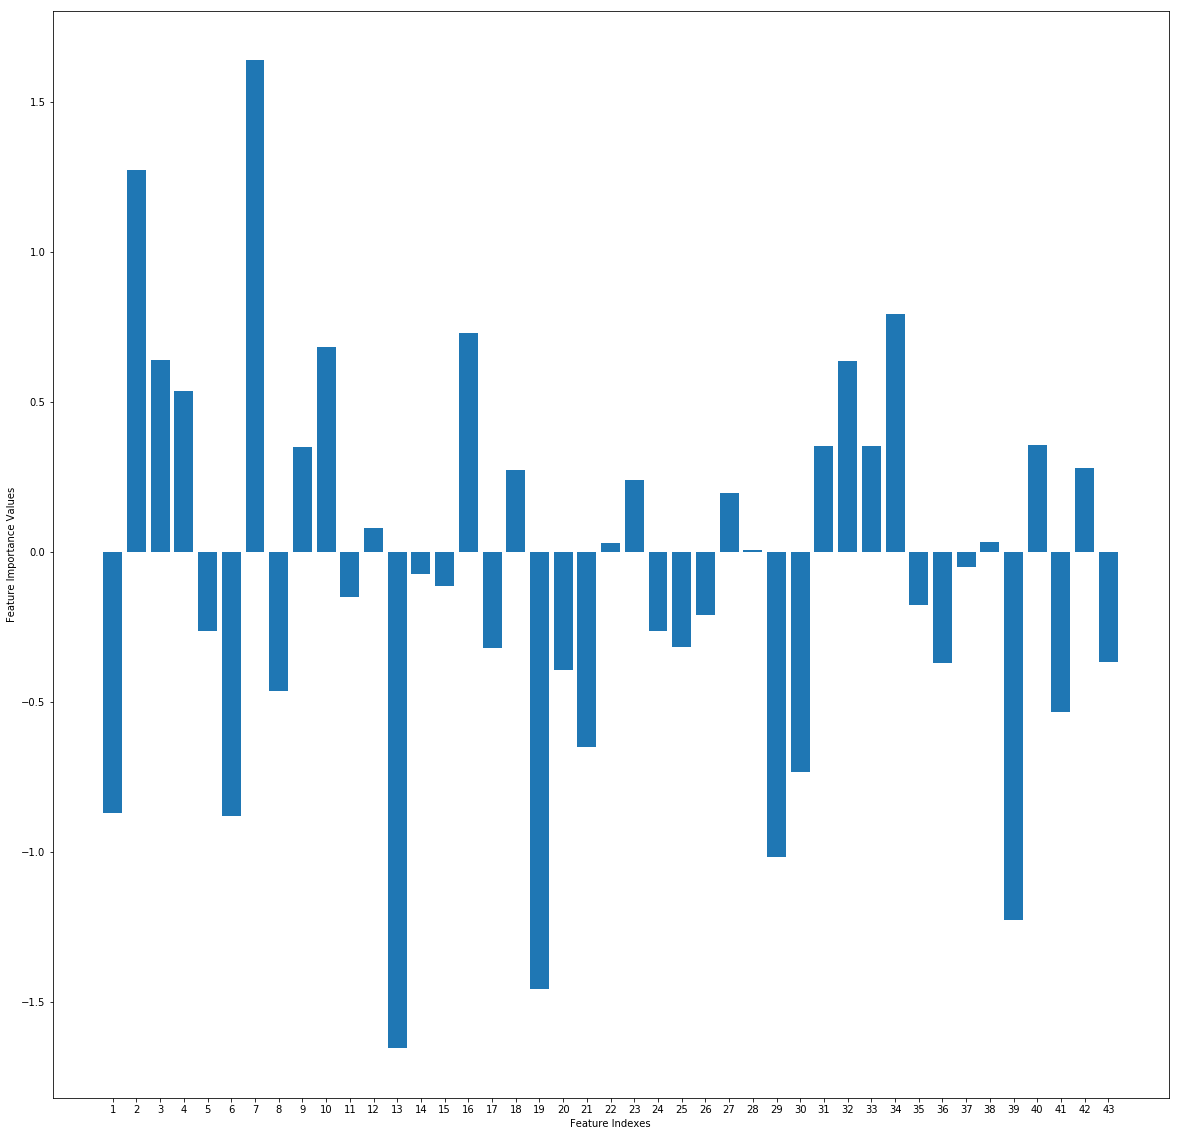

In [859]:
x_vals=np.arange(len(features))
plt.bar(x_vals,var_imp,align='center',alpha=1)
plt.xticks(x_vals,features)
plt.xlabel("Feature Indexes")
plt.ylabel("Feature Importance Values")

In [861]:
best_features=sorted(range(len(var_imp)), key=lambda i: var_imp[i], reverse=True)[:10]

In [862]:
feature_names=list(training_df)
feature_names

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [863]:
for x in best_features:
    print(feature_names[x])

dpkts
dur
ct_dst_ltm
dloss
rate
proto
ct_srv_src
service
ct_flw_http_mthd
response_body_len


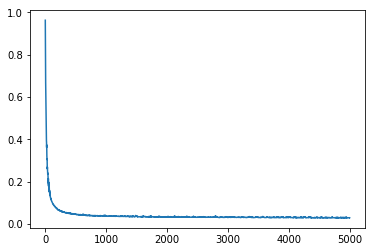

In [857]:
plt.plot(x,y)